In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf 
import datapane as dp
import altair as alt

In [63]:
def alt_forecasts(history, test, prediction, title='Prediction', ylabel='value', xlabel='time', ts=(500,20)):
    # plot forecasts against actual outcomes
    fill_nan = np.empty(len(history))
    fill_nan[:] = np.nan
    in_nan = np.empty(len(test))
    in_nan[:] = np.nan

    in_seq = np.concatenate((np.array(history), in_nan))
    tar_seq = np.concatenate((fill_nan, np.array(test.copy())))
    predicted_seq = np.concatenate((fill_nan, np.array(prediction.copy())))
    df = pd.DataFrame(np.array([in_seq, tar_seq, predicted_seq]).transpose(), columns=['input', 'target', 'prediction'])
    chart = alt.Chart(df).mark_point()

    
plot_list = []
for i in range(5):
    alt_forecasts(hist[:,i], test[:,i], fc[:,i], title=cols[i], ts=(500,20))

report = dp.Report(
    dp.Text('''## Dropdown using Datapane'''),
    dp.Select(blocks = plot_list)
)

DPError: Can't create Select with less than 2 objects
Please run with `dp.enable_logging()`, restart your Jupyter kernel/Python instance, and/or visit https://www.github.com/datapane/datapane to raise issue / discuss if error repeats

In [78]:
def plot_forecasts(history, test, prediction, title='Prediction', ylabel='value', xlabel='time', ts=(500,20)):
    # plot forecasts against actual outcomes
    fill_nan = np.empty(len(history))
    fill_nan[:] = np.nan
    in_nan = np.empty(len(test))
    in_nan[:] = np.nan

    in_seq = np.concatenate((np.array(history), in_nan))
    tar_seq = np.concatenate((fill_nan, np.array(test.copy())))
    predicted_seq = np.concatenate((fill_nan, np.array(prediction.copy())))
    plt.plot(in_seq)
    plt.plot(tar_seq)
    plt.plot(predicted_seq)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(['input_seq', 'target_seq', 'pre_seq'], loc='upper right')
    axes = plt.gca()
    fig_predict = plt.figure(figsize=ts)
    plt.show()

In [79]:
hist = pd.read_csv("results/ICA_LSTM40_60secs_MSE_loss.csv", index_col='Unnamed: 0')
hist.head()

,Loss,Validation Loss
0,5.188086e-07,7.488466e-07
1,3.581423e-07,8.107793e-07
2,3.413953e-07,7.198533e-07
3,3.260066e-07,6.805532e-07
4,3.198573e-07,6.663139e-07


<AxesSubplot:>

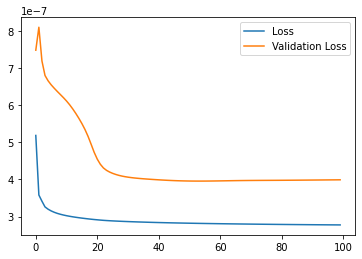

In [80]:
hist.plot()

In [81]:
pred = pd.read_csv("results/ICA_LSTM40_60secs_MSE_prediction.csv", index_col='Unnamed: 0')
pred.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.679435,0.511278,0.607302,0.642481,0.500198,0.911240,0.498038,0.744312,0.744351,0.741635,...,0.682614,0.533248,0.667702,0.509796,0.655787,0.496016,0.661392,0.743438,0.679022,0.687735
1,0.680955,0.479965,0.639025,0.632837,0.486427,0.902525,0.474380,0.742543,0.742586,0.739918,...,0.689628,0.514126,0.672301,0.481792,0.648965,0.480976,0.655154,0.741687,0.685050,0.695934
2,0.681132,0.512991,0.604971,0.648905,0.501500,0.916304,0.499515,0.744015,0.744059,0.741340,...,0.684211,0.535977,0.669270,0.511399,0.657626,0.497355,0.663164,0.743143,0.680519,0.689247
3,0.680077,0.499216,0.607513,0.641677,0.487031,0.912911,0.485686,0.744100,0.744149,0.741454,...,0.683024,0.531889,0.668354,0.497569,0.656614,0.483099,0.662789,0.743239,0.680240,0.688719
4,0.684497,0.460963,0.651921,0.632090,0.473444,0.902847,0.458076,0.742035,0.742089,0.739454,...,0.695133,0.508124,0.676995,0.463949,0.649336,0.467682,0.656083,0.741198,0.690642,0.702225


In [82]:
length = pred.shape[0]

In [83]:
df = pd.read_csv("data/mongo_data.csv", index_col='ts')
df = df.drop('Unnamed: 0', 1)
#Remove cols with the same value

def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)

df = df.loc[:,np.invert(unique_cols(df))]
print(df.shape)
df.tail()

C:\Users\pedro\AppData\Local\Temp\ipykernel_50820\468073868.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


(467334, 39)


,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
ts,,,,,,,,,,,,,,,,,,,,,
2022-02-22T11:17:24.127703575Z,123259.65,411.39,1.12,50.01,411.12,0.99,236.57,31345348,30444914,30360338,...,42346.98,6085.66,39469.35,238.10,41443.33,237.23,174.70,92150704,165.77,179.00
2022-02-22T11:17:25.439348217Z,122868.31,411.33,1.05,50.01,409.30,0.98,236.51,31345362,30444928,30360352,...,40454.14,7272.30,39607.47,237.89,42806.71,236.40,181.08,92150752,166.49,171.04
2022-02-22T11:17:26.705083973Z,123108.94,411.02,1.04,50.01,410.57,0.98,237.13,31345374,30444940,30360364,...,40749.97,8029.02,41030.93,237.73,41328.03,237.20,174.23,92150784,172.60,171.85
2022-02-22T11:17:28.014494747Z,123048.30,410.90,1.02,50.01,410.75,0.99,236.20,31345388,30444952,30360380,...,42542.77,5632.11,39168.28,237.67,41337.26,237.06,174.37,92150824,164.80,180.11
2022-02-22T11:17:29.306443661Z,122208.24,409.81,1.08,50.01,409.76,0.99,235.70,31345400,30444964,30360392,...,41760.77,5949.70,39547.37,237.24,40900.10,236.52,172.93,92150864,166.70,177.18


In [84]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=df.columns, index=df.index)
scaled_df.head()

,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
ts,,,,,,,,,,,,,,,,,,,,,
2022-02-15T10:24:58.903000343Z,0.743565,0.525206,0.537234,0.681818,0.446846,0.98,0.519724,0.000000,0.000000,0.000000,...,0.707483,0.627333,0.739096,0.498763,0.747683,0.466906,0.756375,0.000000,0.752907,0.711968
2022-02-15T10:24:59.374508444Z,0.739004,0.493876,0.659574,0.681818,0.443589,0.99,0.453649,0.000003,0.000003,0.000003,...,0.737740,0.507947,0.731334,0.479960,0.712904,0.448435,0.722294,0.000003,0.746200,0.746613
2022-02-15T10:25:00.655871379Z,0.741547,0.513814,0.452128,0.681818,0.499260,0.99,0.510848,0.000006,0.000006,0.000006,...,0.725338,0.558912,0.735819,0.502721,0.727841,0.507953,0.733805,0.000006,0.749335,0.730465
2022-02-15T10:25:01.887888454Z,0.743124,0.527770,0.531915,0.681818,0.469944,0.99,0.522682,0.000009,0.000009,0.000009,...,0.739171,0.497014,0.736202,0.503711,0.718695,0.485890,0.725887,0.000009,0.749663,0.743651
2022-02-15T10:25:03.145591485Z,0.739277,0.455711,0.659574,0.681818,0.444773,0.99,0.449211,0.000012,0.000012,0.000012,...,0.744462,0.509748,0.740470,0.445819,0.698377,0.455105,0.707189,0.000012,0.757755,0.753730


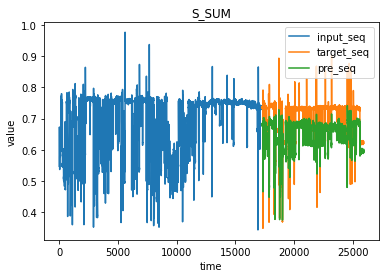

<Figure size 36000x1440 with 0 Axes>

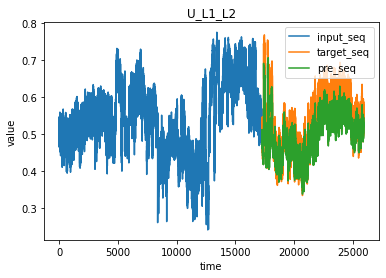

<Figure size 36000x1440 with 0 Axes>

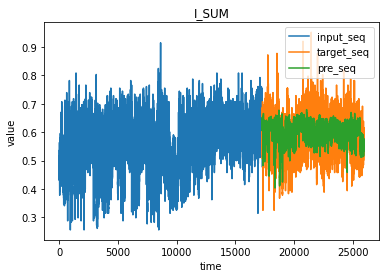

<Figure size 36000x1440 with 0 Axes>

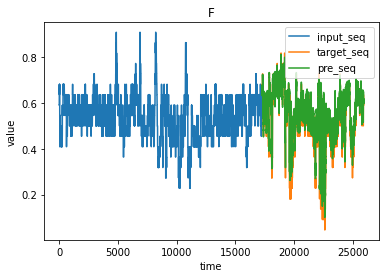

<Figure size 36000x1440 with 0 Axes>

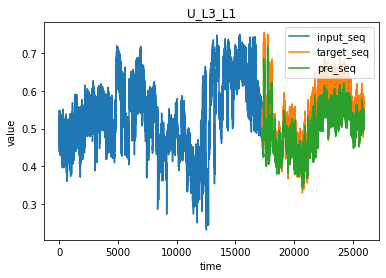

<Figure size 36000x1440 with 0 Axes>

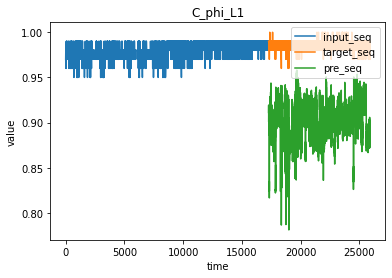

<Figure size 36000x1440 with 0 Axes>

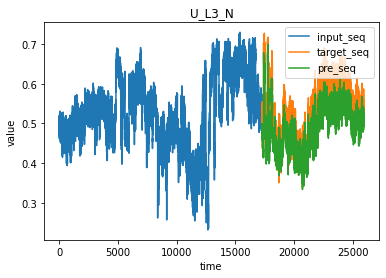

<Figure size 36000x1440 with 0 Axes>

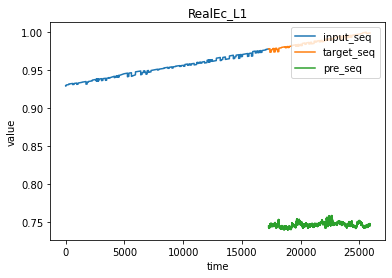

<Figure size 36000x1440 with 0 Axes>

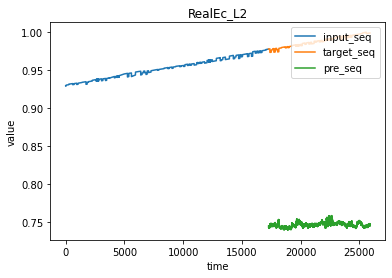

<Figure size 36000x1440 with 0 Axes>

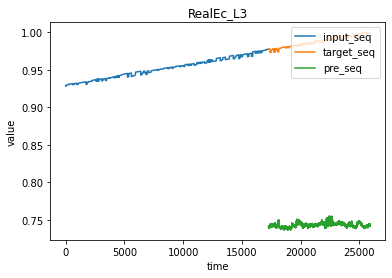

<Figure size 36000x1440 with 0 Axes>

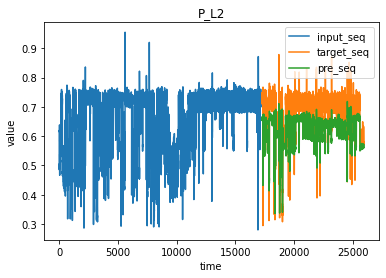

<Figure size 36000x1440 with 0 Axes>

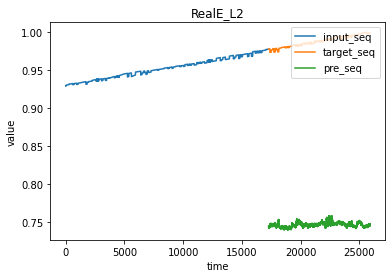

<Figure size 36000x1440 with 0 Axes>

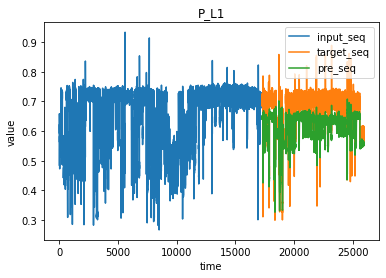

<Figure size 36000x1440 with 0 Axes>

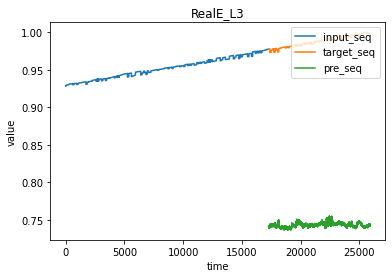

<Figure size 36000x1440 with 0 Axes>

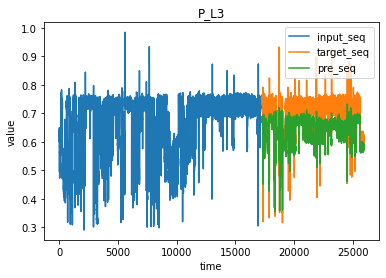

<Figure size 36000x1440 with 0 Axes>

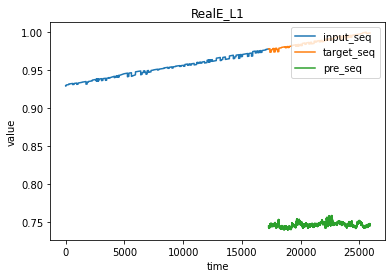

<Figure size 36000x1440 with 0 Axes>

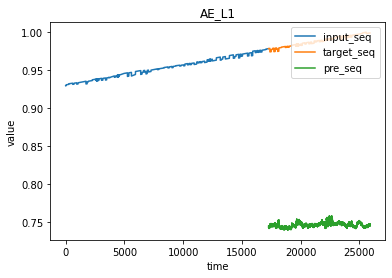

<Figure size 36000x1440 with 0 Axes>

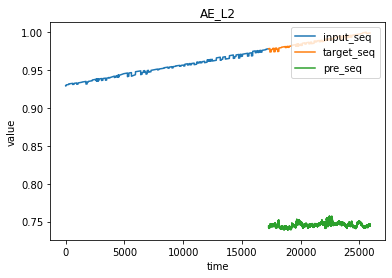

<Figure size 36000x1440 with 0 Axes>

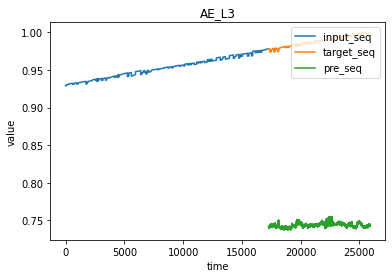

<Figure size 36000x1440 with 0 Axes>

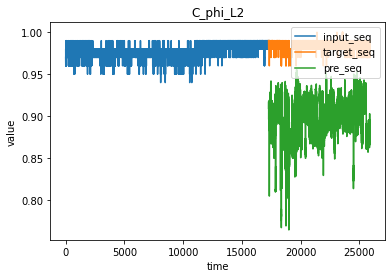

<Figure size 36000x1440 with 0 Axes>

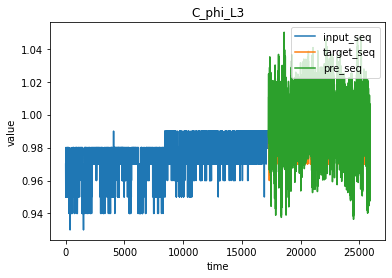

<Figure size 36000x1440 with 0 Axes>

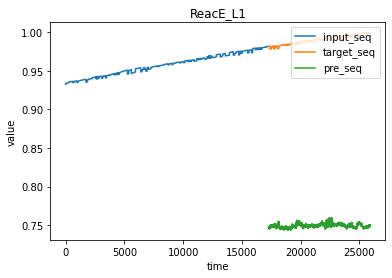

<Figure size 36000x1440 with 0 Axes>

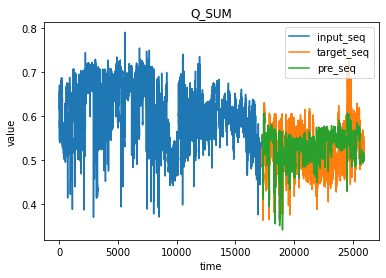

<Figure size 36000x1440 with 0 Axes>

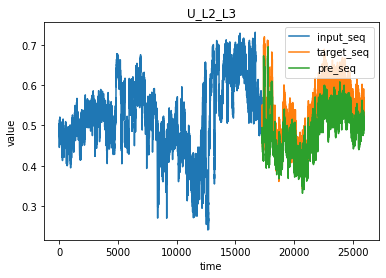

<Figure size 36000x1440 with 0 Axes>

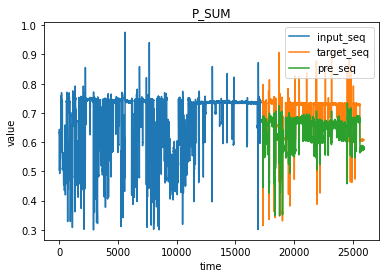

<Figure size 36000x1440 with 0 Axes>

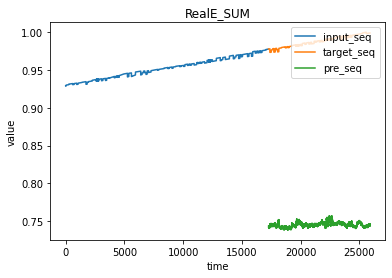

<Figure size 36000x1440 with 0 Axes>

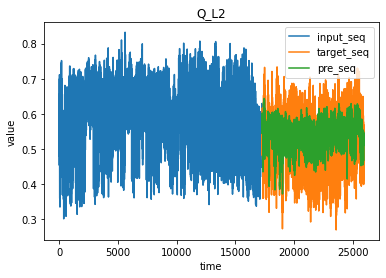

<Figure size 36000x1440 with 0 Axes>

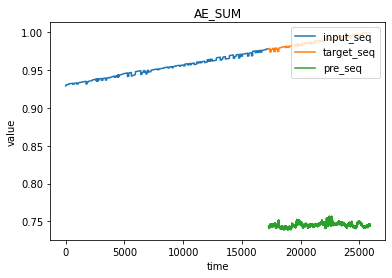

<Figure size 36000x1440 with 0 Axes>

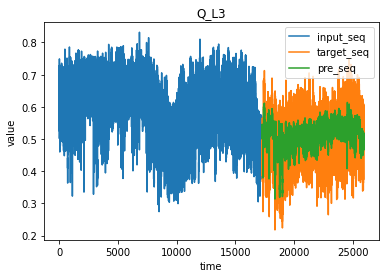

<Figure size 36000x1440 with 0 Axes>

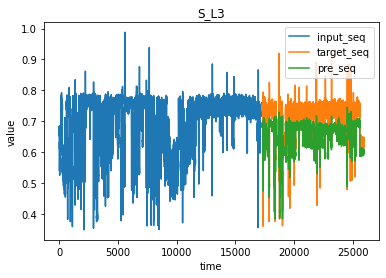

<Figure size 36000x1440 with 0 Axes>

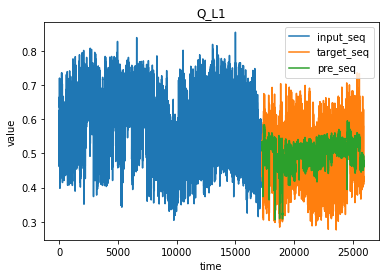

<Figure size 36000x1440 with 0 Axes>

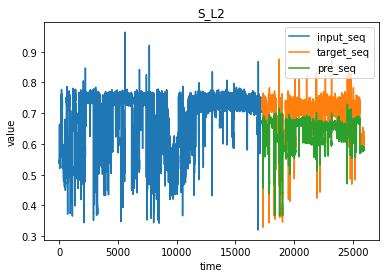

<Figure size 36000x1440 with 0 Axes>

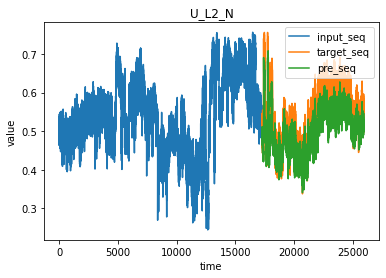

<Figure size 36000x1440 with 0 Axes>

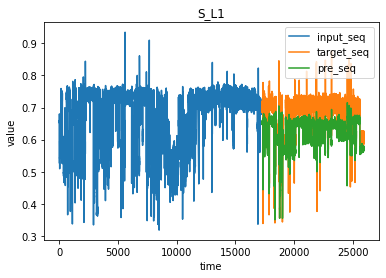

<Figure size 36000x1440 with 0 Axes>

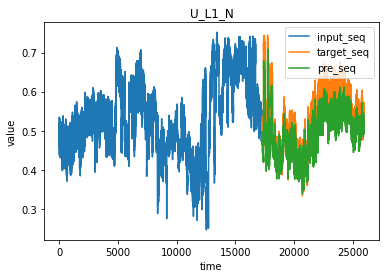

<Figure size 36000x1440 with 0 Axes>

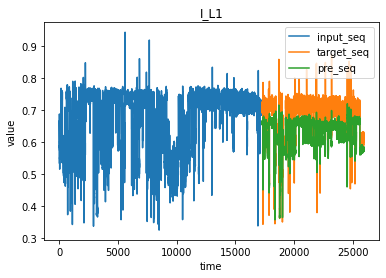

<Figure size 36000x1440 with 0 Axes>

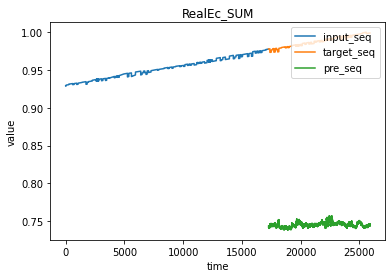

<Figure size 36000x1440 with 0 Axes>

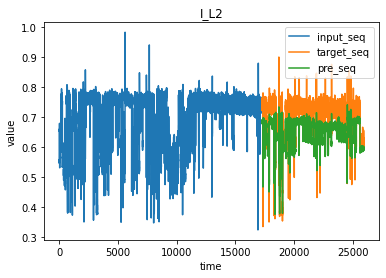

<Figure size 36000x1440 with 0 Axes>

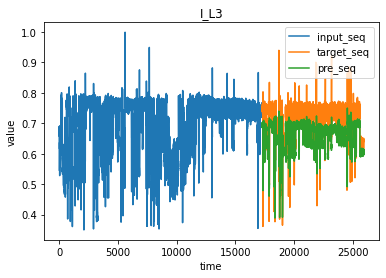

<Figure size 36000x1440 with 0 Axes>

In [85]:
values = scaled_df.values
history_window = int(0.3*24*60*60)
prediction_window = int(0.1*24*60*60)
hist = values[-history_window:-prediction_window,:]
test = values[-prediction_window:,]
fc = pred.values
cols = scaled_df.columns

for i in range(len(cols)):
    plot_forecasts(hist[:,i], test[:,i], fc[:,i], title=cols[i], ts=(500,20))

In [86]:
from sklearn.metrics import mean_squared_error

for i in range(len(cols)):
    rmse = np.sqrt(mean_squared_error(test[:,i], fc[:,i]))
    print('Test %s RMSE: %.3f' % (cols[i], rmse))


Test S_SUM RMSE: 0.053
Test U_L1_L2 RMSE: 0.045
Test I_SUM RMSE: 0.055
Test F RMSE: 0.048
Test U_L3_L1 RMSE: 0.044
Test C_phi_L1 RMSE: 0.088
Test U_L3_N RMSE: 0.044
Test RealEc_L1 RMSE: 0.242
Test RealEc_L2 RMSE: 0.242
Test RealEc_L3 RMSE: 0.245
Test P_L2 RMSE: 0.058
Test RealE_L2 RMSE: 0.242
Test P_L1 RMSE: 0.060
Test RealE_L3 RMSE: 0.245
Test P_L3 RMSE: 0.058
Test RealE_L1 RMSE: 0.242
Test AE_L1 RMSE: 0.242
Test AE_L2 RMSE: 0.243
Test AE_L3 RMSE: 0.244
Test C_phi_L2 RMSE: 0.088
Test C_phi_L3 RMSE: 0.019
Test ReacE_L1 RMSE: 0.241
Test Q_SUM RMSE: 0.037
Test U_L2_L3 RMSE: 0.046
Test P_SUM RMSE: 0.058
Test RealE_SUM RMSE: 0.243
Test Q_L2 RMSE: 0.063
Test AE_SUM RMSE: 0.243
Test Q_L3 RMSE: 0.065
Test S_L3 RMSE: 0.053
Test Q_L1 RMSE: 0.072
Test S_L2 RMSE: 0.052
Test U_L2_N RMSE: 0.047
Test S_L1 RMSE: 0.054
Test U_L1_N RMSE: 0.042
Test I_L1 RMSE: 0.053
Test RealEc_SUM RMSE: 0.243
Test I_L2 RMSE: 0.052
Test I_L3 RMSE: 0.052
